# ***Deep Learning - CNN - AlexNet Architecture***

# ***Mounting Google Drive***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# ***Imports***

In [2]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image
print(os.listdir("../"))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras import initializers
from keras.preprocessing.image import ImageDataGenerator, load_img

import os
from shutil import copyfile
import zipfile

import numpy as np
from sklearn.model_selection import train_test_split
from shutil import rmtree

from keras.applications import inception_v3
from tensorflow.keras.callbacks import Callback
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.layers import Input

['media', 'boot', 'home', 'root', 'sys', 'bin', 'dev', 'srv', 'opt', 'lib64', 'mnt', 'proc', 'tmp', 'sbin', 'var', 'usr', 'run', 'etc', 'lib', 'content', '.dockerenv', 'datalab', 'tools', 'swift', 'dlib-19.18.0-cp36-cp36m-linux_x86_64.whl', 'tensorflow-1.15.2', 'dlib-19.18.0-cp27-cp27mu-linux_x86_64.whl', 'lib32']


Using TensorFlow backend.


# ***Setting up Data Folders***

In [3]:
# Opening zip files 'chest-xray-pneumonia.zip' and 'covid-chest-xray.zip' 
# from data folder in drive and storing them in location /content/data/
# in local enviornment

content_location = '/content/'
pneumonia_zipfile_location = '/content/drive/My Drive/data/chest-xray-pneumonia.zip'
covid_zipfile_location = '/content/drive/My Drive/data/covid-chest-xray.zip'

with zipfile.ZipFile(pneumonia_zipfile_location, 'r') as zip_ref:
    zip_ref.extractall(content_location+'/data/')
print(os.listdir(content_location+'/data/'))

with zipfile.ZipFile(covid_zipfile_location, 'r') as zip_ref:
    zip_ref.extractall(content_location+'/data/')
print(os.listdir(content_location+'/data/'))

['chest_xray']
['images', 'metadata.csv', 'chest_xray']


In [4]:
# Checking contents present in mainDIR location

mainDIR = os.listdir('/content/data/chest_xray/')
print(mainDIR)

['val', 'test', 'train', 'chest_xray', '__MACOSX']


In [0]:
# Declaring train, test and val folders

train_folder= '/content/data/chest_xray/train/'
val_folder = '/content/data/chest_xray/val/'
test_folder = '/content/data/chest_xray/test/'

In [0]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [7]:
# INCEPTION V3
import os
from shutil import copyfile
os.makedirs('images/NORMAL', exist_ok=True)
os.makedirs('images/PNEUMONIA', exist_ok=True)

base_path = '/content/data/chest_xray/'

for path in ['/train', '/test', '/val']:
    print(path)
    for dirname, _, filenames in os.walk(base_path + path):
        # print(dirname)
        # print(filenames)
        for i, file in enumerate(filenames):
            # print(i)
            # print(file)
            img_class = dirname.split('/')[6]
            copyfile(os.path.join(dirname, file), 'images/' + img_class + '/' + file)

/train
/test
/val


In [8]:
# INCEPTION V3
# checking total number of files present in images folder

for dirname, _, filenames in os.walk('images'):
    if(len(dirname.split("/")) > 1):
        print(dirname + " has " + str(len(filenames)) + " files")

images/PNEUMONIA has 4273 files
images/NORMAL has 1583 files


In [0]:
# INCEPTION V3
# Here, initially we had Images pre divided in the form of train folder 
# and test folder. So we are combining those images in 'images' folder
# and then splitting them using train_test_split function i.e. we are ignoring 
# the train test split provided by the dataset and are building our own 80-20% 
# train test split and then saving them again in seperate train and test folders

#rmtree('train') # Remove existing, if re-run
#rmtree('test') # Remove existing, if re-run

os.makedirs('train/NORMAL', exist_ok=True)
os.makedirs('train/PNEUMONIA', exist_ok=True)
os.makedirs('test/NORMAL', exist_ok=True)
os.makedirs('test/PNEUMONIA', exist_ok=True)

# Split NORMAL
train, test = train_test_split(os.listdir('images/NORMAL'), 
                               test_size=0.2, 
                               random_state=42)
for img in train:
    copyfile(os.path.join('images/NORMAL/', img), 
             os.path.join('train/NORMAL/', img))
for img in test:
    copyfile(os.path.join('images/NORMAL/', img), 
             os.path.join('test/NORMAL/', img))

# Split PNEUMONIA
train, test = train_test_split(os.listdir('images/PNEUMONIA'), 
                               test_size=0.2, 
                               random_state=42)
for img in train:
    copyfile(os.path.join('images/PNEUMONIA/', img), 
             os.path.join('train/PNEUMONIA/', img))
for img in test:
    copyfile(os.path.join('images/PNEUMONIA/', img), 
             os.path.join('test/PNEUMONIA/', img))

# ***Viewing some images***

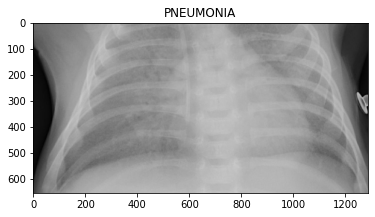

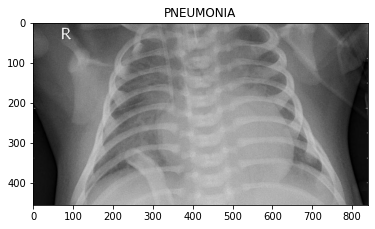

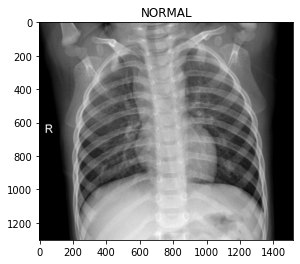

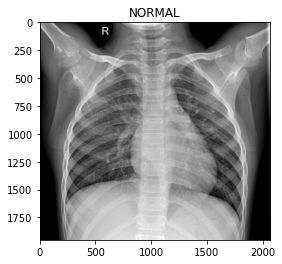

In [10]:
# INCEPTION V3

from matplotlib import pyplot as plt
from matplotlib import image as mpimg

for dirname, _, filenames in os.walk('train'):
    for i, file in enumerate(filenames):
        if(i > 1):
            break
        plt.imshow(mpimg.imread(os.path.join(dirname, file)), cmap='gray')
        plt.title(dirname.split('/')[1])
        plt.show()

# ***Setting up data for model***

In [11]:
# INCEPTION V3

from tensorflow.keras.preprocessing.image import ImageDataGenerator

SIZE = 224
BATCH = 64

# image augmentations
image_gen = ImageDataGenerator(rescale=1./255,
                                rotation_range=5,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                validation_split=0.2)

# flow_from_directory generators
train_generator = image_gen\
    .flow_from_directory('train',
                        target_size=(SIZE, SIZE),
                        class_mode="binary",
                        batch_size=BATCH,
                        subset='training')

validation_generator = image_gen\
    .flow_from_directory('train',
                        target_size=(SIZE, SIZE),
                        class_mode="binary",
                        batch_size=BATCH,
                        subset='validation')

test_set = image_gen\
    .flow_from_directory('test',
                        target_size=(SIZE, SIZE),
                        class_mode="binary",
                        batch_size=BATCH,
                        subset='validation')

Found 3748 images belonging to 2 classes.
Found 936 images belonging to 2 classes.
Found 234 images belonging to 2 classes.


# ***Compile InceptionV3 model***

In [12]:
# Callbacks
## Keep the best model
mc = ModelCheckpoint('model.hdf5', 
                     save_best_only=True, 
                     verbose=0, 
                     monitor='val_loss', 
                     mode='min')

## Reduce learning rate if it gets stuck in a plateau
rlr = ReduceLROnPlateau(  monitor='val_loss', 
                          factor=0.3, 
                          patience=3, 
                          min_lr=0.000001, 
                          verbose=1
                        )

# Model
## Define the base model with EfficientNet weights
model = inception_v3.InceptionV3(  weights = 'imagenet', 
                include_top = False, 
                input_shape = ( SIZE, SIZE, 3 ) 
              )

## Output layer
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation="relu")(x)
x = Dense(32, activation="relu")(x)
predictions = Dense(1, activation="sigmoid")(x)

## Compile and run
model = Model(inputs=model.input, outputs=predictions)

model.compile(optimizer='adam',
              loss='binary_crossentropy', 
              metrics=['accuracy', Recall(), Precision()])



87916544/87910968 [==============================] - 1s 0us/step


In [13]:
# Check model summary

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

# ***Training Model***

In [14]:
model_history = model.fit(train_generator,
                            validation_data=validation_generator,
                            steps_per_epoch=train_generator.n/BATCH,
                            validation_steps=validation_generator.n/BATCH,
                            epochs=15,
                            verbose=1,
                            callbacks=[mc, rlr])

Epoch 1/15
59/58 [==============================] - 1920s 33s/step - loss: 0.1867 - accuracy: 0.9248 - recall: 0.9017 - precision: 0.9060 - val_loss: 24.0728 - val_accuracy: 0.2788 - val_recall: 0.8445 - val_precision: 0.9427
Epoch 2/15
59/58 [==============================] - 1900s 32s/step - loss: 0.1032 - accuracy: 0.9621 - recall: 0.8235 - precision: 0.9504 - val_loss: 6.1001 - val_accuracy: 0.6934 - val_recall: 0.8457 - val_precision: 0.9576
Epoch 3/15
59/58 [==============================] - 1912s 32s/step - loss: 0.0857 - accuracy: 0.9666 - recall: 0.8572 - precision: 0.9613 - val_loss: 0.0786 - val_accuracy: 0.9509 - val_recall: 0.8781 - val_precision: 0.9641
Epoch 4/15
59/58 [==============================] - 1913s 32s/step - loss: 0.0704 - accuracy: 0.9731 - recall: 0.8922 - precision: 0.9670 - val_loss: 0.4112 - val_accuracy: 0.9380 - val_recall: 0.9024 - val_precision: 0.9688
Epoch 5/15
59/58 [==============================] - 1906s 32s/step - loss: 0.0591 - accuracy: 0.979

# ***Printing Accuracy and Plot Training Metrics***

In [15]:
test_accu = model.evaluate_generator(test_set,steps=624)
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 98.90697002410889 %


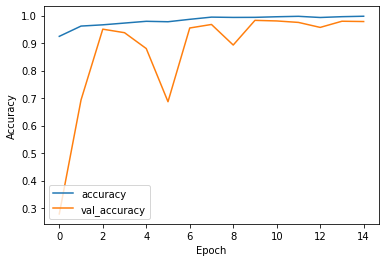

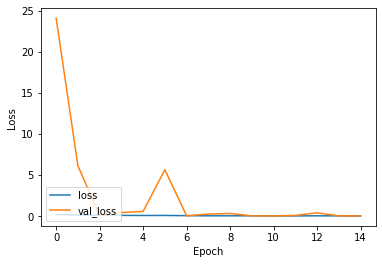

In [16]:
# Evaluate the model

# Accuracy

plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower left')
plt.show()

# Loss
plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0.5, 1])
plt.legend(loc='lower left')
plt.show()
